In [1]:
import numpy
import numpy as np
from PIL import Image
from matplotlib import cm,pyplot
from matplotlib.pyplot import figure

def Compress(img, ComponentCount):
    """This function uses a singular value decomposition to compress an image.
      \param Image An quadratic array providing the image. Entries provide the 
             brightness of indidividual pixels, rows correspond to scanlines.
      \param ComponentCount The number of singular values to be maintained in the 
             compressed representation.
      \return A tuple (U,SingularValues,V,CompressionRatio) such that U*Sigma*V^* 
              provides an approximation to the original image when Sigma is a 
              diagonal matrix with SingularValues on its main diagonal. 
              CompressionRatio should provide the quotient of the number of scalars 
              in Image and the number of scalars in the returned representation of 
              Image."""
    U, Sigma, V = np.linalg.svd(img)
    
    Sigma = Sigma[:ComponentCount]
    Ratio = len(Sigma)/ComponentCount
    
    
    return (U, Sigma, V.transpose(), Ratio)


def Decompress(U, SingularValues, V):
    """Given a compressed representation of an image as produced by Compress() this 
       function reconstructs the original image approximately and returns it."""
    Sigma = np.zeros(( U.shape[0],V.shape[0]))
    sValuesMAtrix = np.pad(np.diag(SingularValues),((0,U.shape[0]-len(SingularValues)),(0,V.shape[0]-len(SingularValues))),mode='constant')
    Sigma = Sigma + sValuesMAtrix
    Vtrans = np.transpose(V)
    A = U * Sigma * Vtrans
    return A # TODO implement the function

Lena
Compression ratio for p=1 is 1.0:1.
Compression ratio for p=4 is 1.0:1.
Compression ratio for p=8 is 1.0:1.
Compression ratio for p=32 is 1.0:1.
Compression ratio for p=64 is 1.0:1.

Stoff
Compression ratio for p=1 is 1.0:1.
Compression ratio for p=4 is 1.0:1.
Compression ratio for p=8 is 1.0:1.
Compression ratio for p=32 is 1.0:1.
Compression ratio for p=64 is 1.0:1.

Stoff2
Compression ratio for p=1 is 1.0:1.
Compression ratio for p=4 is 1.0:1.
Compression ratio for p=8 is 1.0:1.
Compression ratio for p=32 is 1.0:1.
Compression ratio for p=64 is 1.0:1.



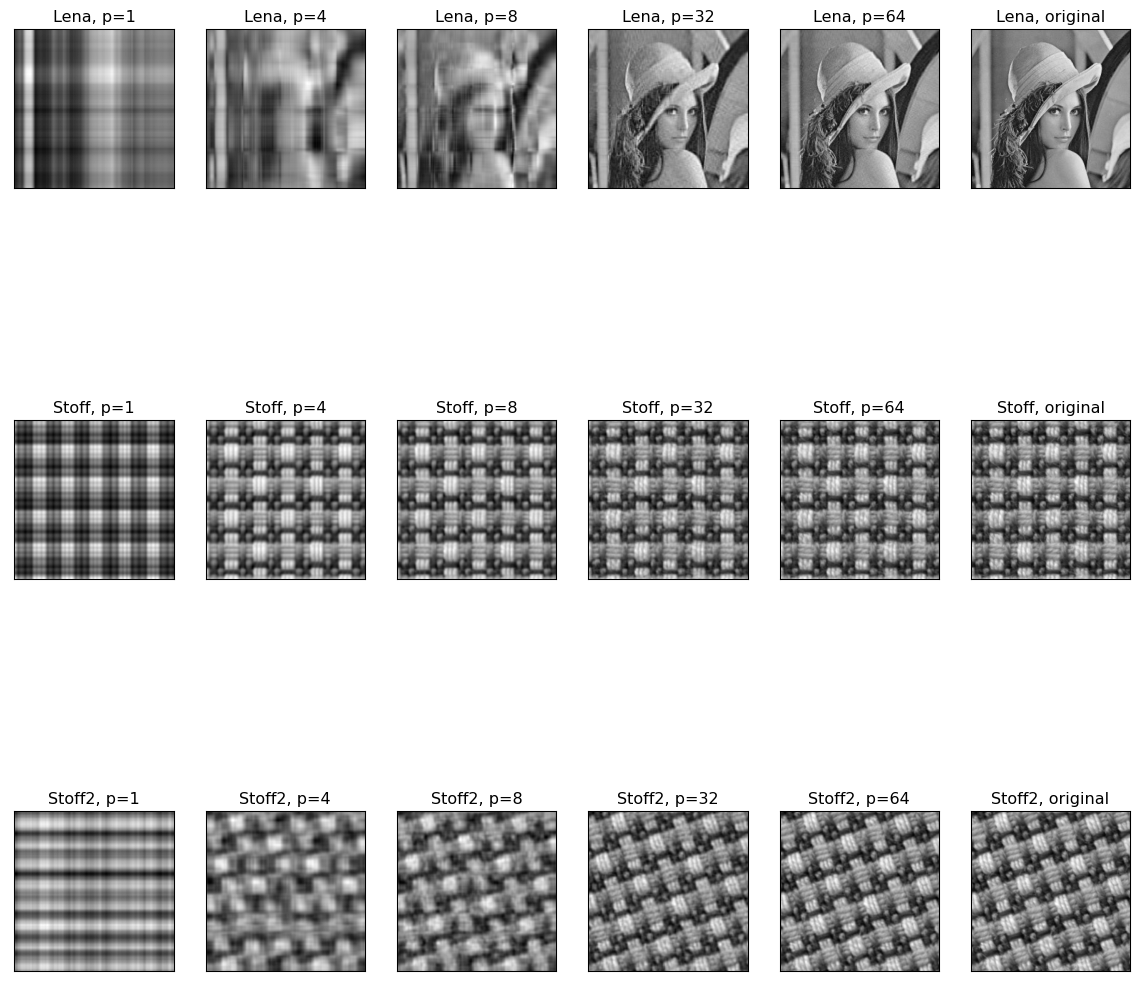

In [2]:
if(__name__=="__main__"):
    # Define the task
    ImageFileNameList=["Lena","Stoff","Stoff2"]
    ComponentCountList=[1,4,8,32,64]
    # Iterate over all tasks and generate one large plot
    PlotIndex=1
    figure(figsize=(15, 15), dpi=96)
    for ImageFileName in ImageFileNameList:
        print(ImageFileName)
        ImagePath=ImageFileName+".png"
        img=Image.open(ImagePath)
        
        # Convert to numpy array
        imgmat = np.array(list(img.getdata(band=0)), float)        
        # Reshape according to orginal image dimensions
        imgmat.shape = (img.size[1], img.size[0])
        imgmat = np.matrix(imgmat)
        
        # Compressed Images
        for ComponentCount in ComponentCountList:
            # Define a subplot for this decompressed image
            Axes=pyplot.subplot(len(ImageFileNameList),len(ComponentCountList)+1,PlotIndex);
            Axes.set_xticks([]);
            Axes.set_yticks([]);
            Axes.set_title(ImageFileName+", p="+str(ComponentCount));
            PlotIndex+=1;
            
            # Apply compression
            U,SingularValues,V,CompressionRatio=Compress(imgmat,ComponentCount);
            # Apply decompression
            DecompressedImage=Decompress(U,SingularValues,V);
            
            # Show the result
            pyplot.imshow(DecompressedImage,cmap=cm.gray);
            # Compute and print the compression ratio
            print("Compression ratio for p="+str(ComponentCount)+" is "+str(CompressionRatio)+":1.");

        # Original Image
        Axes=pyplot.subplot(len(ImageFileNameList),len(ComponentCountList)+1,PlotIndex);
        Axes.set_xticks([]);
        Axes.set_yticks([]);
        Axes.set_title(ImageFileName+", original");
        pyplot.imshow(imgmat,cmap=cm.gray)
        PlotIndex+=1;
        
        print("");
    pyplot.show();